In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
# create a secret string for the oracle
shh = '110'
n = len(str(shh))

circuit = QuantumCircuit(2*n)

In [3]:
# Put all qubits from the first register in a superposition state

circuit.h(range(n))
circuit.barrier()

In [4]:
# This is the oracle
for i in range(n):
    if shh[i]=='1': # This is where we control the oracle with the shh
        for j in range(n):
            circuit.cx(i, n+j) # apply CNOT to all target qubits
circuit.barrier()

In [5]:
# undo the Hadamard transform of input register
circuit.h(range(n))

# measure everything
circuit.measure_all()

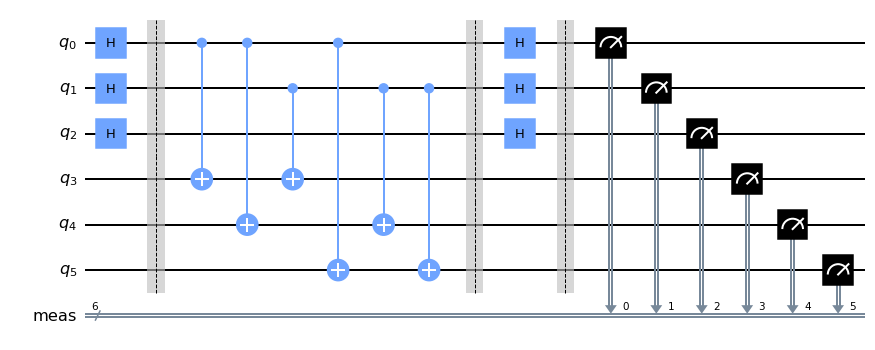

In [6]:
circuit.draw('mpl')

Counts: {'000011': 265, '111000': 272, '000000': 266, '111011': 221}


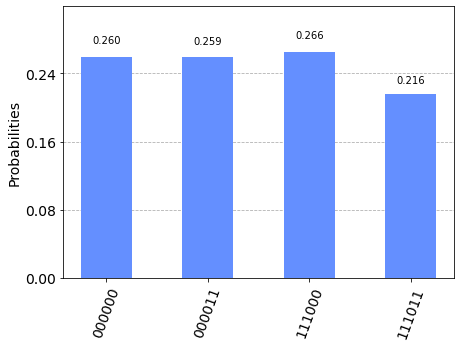

In [7]:
# Execute
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1024)
results = job.result()
counts = results.get_counts(circuit)

print('Counts:', counts)
plot_histogram(counts)

Sub Results: {'011': 486, '000': 538}


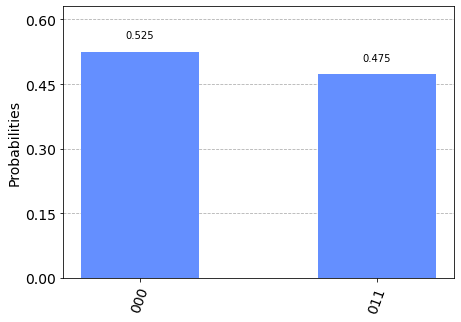

In [9]:
# Let us find the oracle
sub_results = {}
for c in counts.keys():
    rev_c_key = c[::-1]
    in_c = c[n:]
    c_val = counts[c]
    if in_c in sub_results:
        sub_results[in_c] += c_val
    else:
        sub_results[in_c] = c_val
        
print('Sub Results:', sub_results)
plot_histogram(sub_results)

In [10]:
# String values are reversed, the second register result is thus 110 - our shh